In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

### test

In [11]:
irri_2 = pd.read_csv("dataset/Irrigation_2.csv", sep = ';', encoding='ISO-8859-1', index_col=False)
irri_3 = pd.read_csv("dataset/Irrigation_3.csv", sep = ';', encoding='ISO-8859-1', index_col=False)
irri_4 = pd.read_csv("dataset/Irrigation_4.csv", sep = ';', encoding='ISO-8859-1', index_col=False)
irri_5 = pd.read_csv("dataset/Irrigation_5.csv", sep = ';', encoding='ISO-8859-1', index_col=False)
irri_6 = pd.read_csv("dataset/Irrigation_6.csv", sep = ';', encoding='ISO-8859-1', index_col=False)
irri_7 = pd.read_csv("dataset/Irrigation_7.csv", sep = ';', encoding='ISO-8859-1', index_col=False)
irri_8 = pd.read_csv("dataset/Irrigation_8.csv", sep = ';', encoding='ISO-8859-1', index_col=False)
irri_9 = pd.read_csv("dataset/Irrigation_9.csv", sep = ';', encoding='ISO-8859-1', index_col=False)

In [20]:
column_names = irri_4.columns.tolist()
print(column_names)

['Campagne', 'Region', 'Site', 'Famille', 'Variete', 'Num Parcelle', 'Code Traçabilité', 'Date', 'Qté eau (m3)']


In [17]:
print(irri_2.dtypes)

Campagne            object
Region              object
Site                object
Famille             object
Variete             object
Num Parcelle        object
Code Traçabilité    object
Date                object
Qté eau (m3)        object
dtype: object


In [13]:
irri_2.head()

,Campagne,Region,Site,Famille,Variete,Num Parcelle,Code Traçabilité,Date,Qté eau (m3)
0,20/21,GHARB,Douar Oued Mahdouma,AF,AF1,11011,TR11011,01/10/20,"185,4000"
1,20/21,GHARB,Douar Oued Mahdouma,AF,AF1,11011,TR11011,02/10/20,"186,6000"
2,20/21,GHARB,Douar Oued Mahdouma,AF,AF1,11011,TR11011,04/10/20,"184,2000"
3,20/21,GHARB,Douar Oued Mahdouma,AF,AF1,11011,TR11011,05/10/20,"183,6000"
4,20/21,GHARB,Douar Oued Mahdouma,AF,AF1,11011,TR11011,06/10/20,"180,9000"


In [29]:
import pandas as pd

key_columns = ['Site', 'Variete', 'Num Parcelle', 'Code Traçabilité']

# Assuming your datasets are named sequentially as irri_2, irri_3, ..., irri_9
for i in range(2, 10):  # 2 to 9
    dataset = globals()[f'irri_{i}']  # Dynamically get the dataset
    
    print(f"Traitement de l'ensemble de données {i}")
    
    # Convert multiple columns to string in one go
    dataset[key_columns] = dataset[key_columns].astype(str)
    
    # Convert 'Date' column to datetime
    dataset['Date'] = pd.to_datetime(dataset['Date'])

    # Display data types and unique value counts
    print(f"Nombre de valeurs uniques pour chaque clé dans l'ensemble de données {i} :\n{dataset[key_columns].nunique()}")

    # Check for duplicates
    if dataset[dataset.duplicated()] != 0:
        dataset.drop_duplicates()
        dataset.reset_index(drop=True)
        print(f"Des doublons ont été trouvés dans l'ensemble de données {i} pour les clés de fusion.")
    else:
        print(f"Aucun doublon trouvé dans l'ensemble de données {i} pour les clés de fusion.")

Traitement de l'ensemble de données 2
Nombre de valeurs uniques pour chaque clé dans l'ensemble de données 2 :
Site                  7
Variete              33
Num Parcelle        243
Code Traçabilité    125
dtype: int64


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Code

In [39]:
train = pd.read_csv("dataset/train.csv", sep = ';', index_col=False)

## EDA

In [9]:
train.head()

,Id,Campagne,Region,Site,Famille,Variete,Num Parcelle,CodeTracabilite,Date,Tonnage
0,1,20/21,GHARB,Chorf Laghouazi,CLA,CLA1,13030,TR11130,01/10/2020,"269,855"
1,2,20/21,GHARB,Chorf Laghouazi,CLA,CLA6,18030,TR11140,01/10/2020,"101605,9951"
2,3,20/21,GHARB,Chorf Laghouazi,CLA,CLA12,13010,TR11120,01/10/2020,"170,354"
3,4,20/21,GHARB,Chorf Laghouazi,CLA,CLA14,12010,TR11090,01/10/2020,"37891,08567"
4,5,20/21,GHARB,Chorf Laghouazi,CLA,CLA14,12020,TR11100,01/10/2020,"45197,56034"


In [20]:
train.shape

(3119, 10)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Campagne         3119 non-null   object        
 1   Region           3119 non-null   object        
 2   Site             3119 non-null   object        
 3   Famille          3119 non-null   object        
 4   Variete          3119 non-null   object        
 5   CodeTracabilite  3119 non-null   object        
 6   Date             3119 non-null   datetime64[ns]
 7   Tonnage          3119 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 195.1+ KB


In [49]:
train = train.drop(columns=['Id', 'Num Parcelle'])
train["Date"] = pd.to_datetime(train["Date"])
train['Tonnage'] = train['Tonnage'].str.replace(',', '.').astype(float)

In [108]:
train.describe()

,Date,Tonnage
count,3119,3119.000000
mean,2021-04-05 23:50:45.976274688,20812.885034
min,2020-01-10 00:00:00,65.300000
25%,2021-01-01 00:00:00,2715.800000
50%,2021-01-11 00:00:00,9226.100000
75%,2022-01-02 00:00:00,23098.665185
max,2022-01-12 00:00:00,805816.229000
std,NaN,38966.136193


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Campagne         3119 non-null   object        
 1   Region           3119 non-null   object        
 2   Site             3119 non-null   object        
 3   Famille          3119 non-null   object        
 4   Variete          3119 non-null   object        
 5   CodeTracabilite  3119 non-null   object        
 6   Date             3119 non-null   datetime64[ns]
 7   Tonnage          3119 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 195.1+ KB


### Spot anomalies

In [41]:
# Detecting duplicates
duplicates = train[train.duplicated()]
duplicates

,Id,Campagne,Region,Site,Famille,Variete,Num Parcelle,CodeTracabilite,Date,Tonnage


In [115]:
cleaned_train = train.drop_duplicates()

In [116]:
cleaned_train = cleaned_train.reset_index(drop=True)

In [117]:
cleaned_train.head()

,Campagne,Region,Site,Famille,Variete,CodeTracabilite,Date,Tonnage
0,20/21,GHARB,Chorf Laghouazi,CLA,CLA1,TR11130,2020-01-10,269.85500
1,20/21,GHARB,Chorf Laghouazi,CLA,CLA6,TR11140,2020-01-10,101605.99510
2,20/21,GHARB,Chorf Laghouazi,CLA,CLA12,TR11120,2020-01-10,170.35400
3,20/21,GHARB,Chorf Laghouazi,CLA,CLA14,TR11090,2020-01-10,37891.08567
4,20/21,GHARB,Chorf Laghouazi,CLA,CLA14,TR11100,2020-01-10,45197.56034


In [120]:
print(cleaned_train['Variete'])


0        CLA1
1        CLA6
2       CLA12
3       CLA14
4       CLA14
        ...  
3110     ORA4
3111     ORA4
3112     ORA4
3113     ORA4
3114     ORA4
Name: Variete, Length: 3115, dtype: object


In [71]:
cleaned_train.isnull().sum()  ##none null value

Campagne           0
Region             0
Site               0
Famille            0
Variete            0
CodeTracabilite    0
Date               0
Tonnage            0
dtype: int64

<Axes: ylabel='Tonnage'>

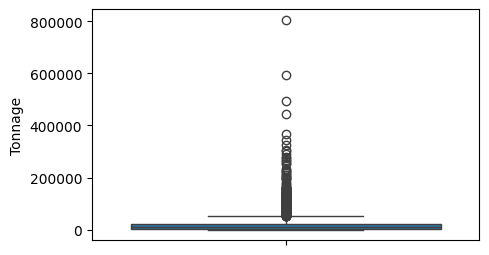

In [72]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=cleaned_train['Tonnage'])

In [94]:
# Set 'Date' as the index of the DataFrame for plotting
cleaned_train.set_index('Date', inplace=True)

# Sort the DataFrame by the index (Date) if it's not already sorted
cleaned_train.sort_index(inplace=True)

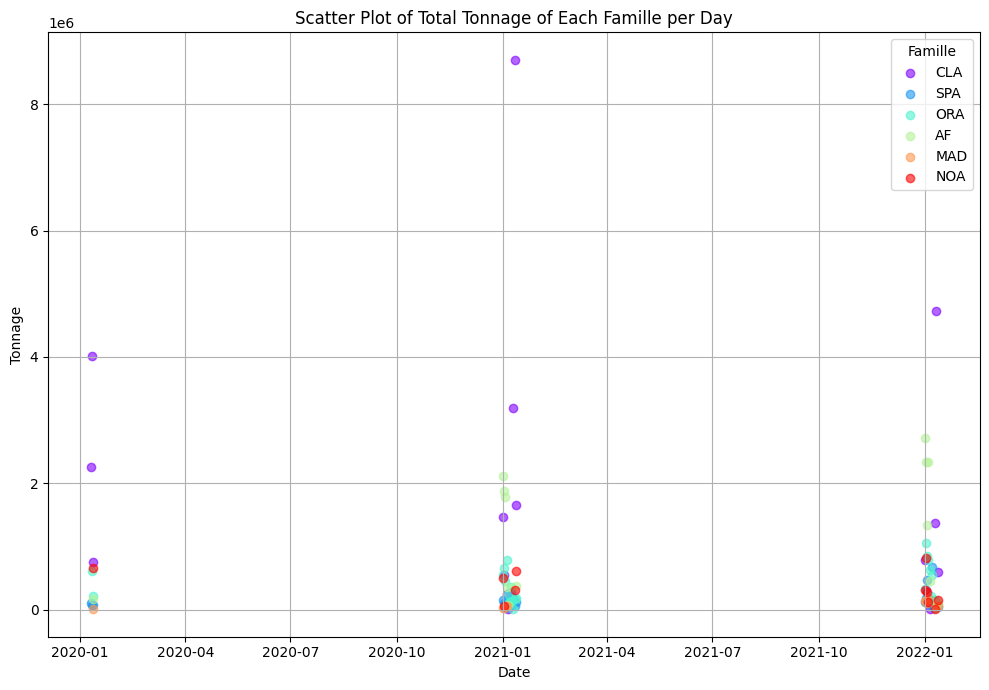

In [107]:
grouped = cleaned_train.groupby(['Date', 'Famille']).agg({'Tonnage': 'sum'}).reset_index()

# Create a scatter plot for each 'Famille'
plt.figure(figsize=(10, 7))

# Get unique families for coloring
families = grouped['Famille'].unique()

# Assign a color to each famille
colors = plt.cm.rainbow(np.linspace(0, 1, len(families)))
famille_color = dict(zip(families, colors))

# Plot each famille's data with a different color and label
for famille, color in famille_color.items():
    famille_data = grouped[grouped['Famille'] == famille]
    plt.scatter(famille_data['Date'], famille_data['Tonnage'], color=color, label=famille, alpha=0.6)

plt.title('Scatter Plot of Total Tonnage of Each Famille per Day')
plt.xlabel('Date')
plt.ylabel('Tonnage')
plt.legend(title='Famille')
plt.grid(True)
plt.tight_layout()
plt.show()

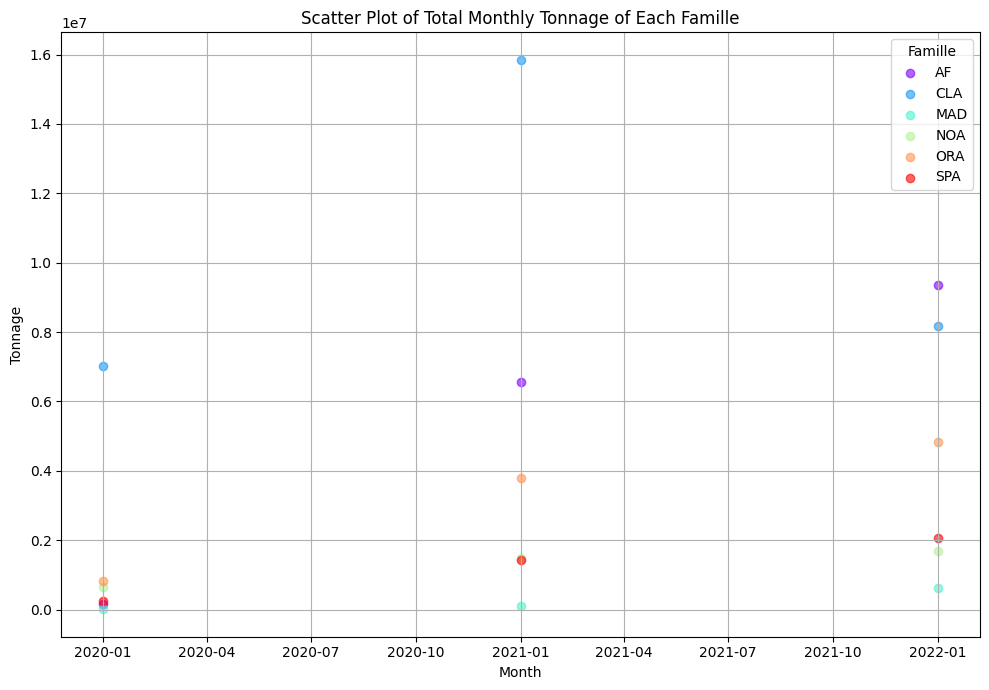

In [111]:
# Create a new column for year-month
cleaned_train['YearMonth'] = cleaned_train['Date'].dt.to_period('Y')

# Group by 'YearMonth' and 'Famille' and sum 'Tonnage'
grouped = cleaned_train.groupby(['YearMonth', 'Famille']).agg({'Tonnage': 'sum'}).reset_index()

# Plotting code remains largely the same, replace 'Date' with 'YearMonth'
plt.figure(figsize=(10, 7))

# Get unique families for coloring
families = grouped['Famille'].unique()

# Assign a color to each famille
colors = plt.cm.rainbow(np.linspace(0, 1, len(families)))
famille_color = dict(zip(families, colors))

# Plot each famille's data with a different color and label
for famille, color in famille_color.items():
    famille_data = grouped[grouped['Famille'] == famille]
    plt.scatter(famille_data['YearMonth'].dt.to_timestamp(), famille_data['Tonnage'], color=color, label=famille, alpha=0.6)

plt.title('Scatter Plot of Total Monthly Tonnage of Each Famille')
plt.xlabel('Month')
plt.ylabel('Tonnage')
plt.legend(title='Famille')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Save the cleaned dataframe to a new file
# df.to_csv('cleaned_data.csv', index=False)

### Others

In [ ]:
train_trans = train.set_index(['Campagne', 'Region', 'Site', 'Famille', 'Variete', 'Num Parcelle', 'CodeTracabilite', 'Date']).sort_index()

In [ ]:
train_trans.head()

Tonnage
Campagne Region Site        Famille Variete Num Parcelle CodeTracabilite Date                   
20/21    GHARB  Ben Mansour AF      AF1     11240        TR11240         2020-01-12          161
                                                                         2021-01-02   22747,5905
                            CLA     CLA13   11130        TR11130         2020-01-10  36082,22357
                                            11212        TR11212         2020-01-10  48051,99275
                                    CLA14   11211        TR11211         2020-01-10  24892,98368

▶️311


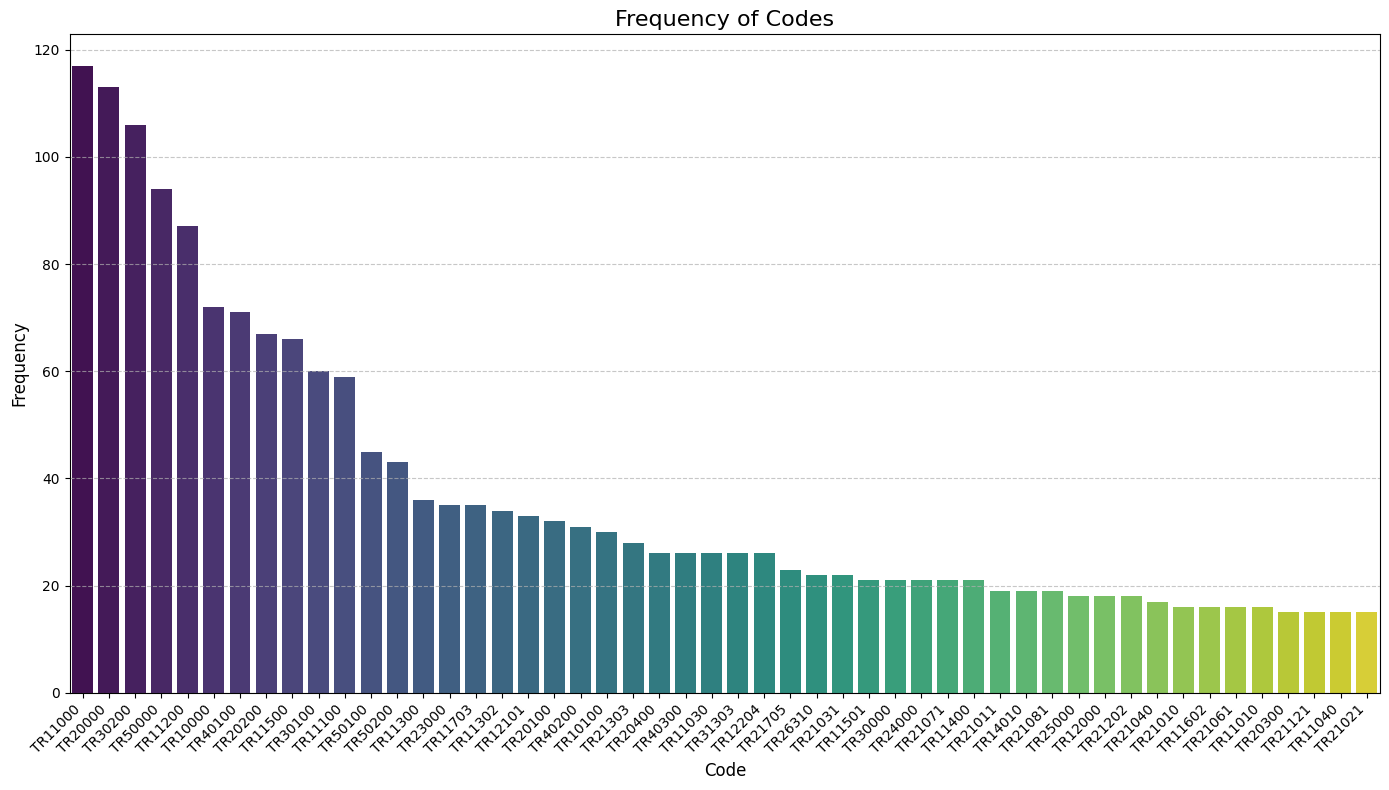

In [ ]:
## Observations non uniformes!

CodeTracabilite = len(train["CodeTracabilite"].value_counts().index)

print(f'▶️{CodeTracabilite}')
top_n = 50  # Number of top codes to display
top_codes = train['CodeTracabilite'].value_counts().head(top_n)

plt.figure(figsize=(14, 8))  # Adjust the size as needed
sns.barplot(x=top_codes.index, y=top_codes.values, palette='viridis')
plt.xlabel('Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and alignment
plt.yticks(fontsize=10)
plt.title('Frequency of Codes', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()